In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sys import stdout
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.ndimage
from  scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
import pywt
import os
import sys

### Dans un premier temps, nous travaillons avec deux ensembles de données qui se trouvent dans les dossiers **LUCAS_SOC_Cropland_6111_Nocita** et **Wheat_Proteine_100_Wang** et que j'ai chargé dans mon Google drive.

## `Chargeons nos données et affichons-les`

**1)** Pour `LUCAS_SOC_Cropland_6111_Nocita`

In [3]:
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\DASSEBE\AppData\Local\Programs\Python\Python37\python.exe
3.7.8 (tags/v3.7.8:4b47a5b6ba, Jun 28 2020, 08:53:46) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=8, releaselevel='final', serial=0)


In [4]:
!python --version

Python 3.7.8


In [5]:
print(sys.path)

['c:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\DLLs', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37', '', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32\\lib', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\Pythonwin', 'C:\\Users\\DASSEBE\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\DASSEBE\\.ipython']


In [6]:
df1 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\LUCAS_SOC_Cropland_6111_Nocita\\Xcal.csv", delimiter=None, sep = ';', header=0)
df2 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\LUCAS_SOC_Cropland_6111_Nocita\\Xval.csv", delimiter=None, sep = ';', header=0)
df3 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\LUCAS_SOC_Cropland_6111_Nocita\\Ycal.csv", delimiter=None, sep = ';', header=0)
df4 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\LUCAS_SOC_Cropland_6111_Nocita\\Yval.csv", delimiter=None, sep = ';', header=0)

In [7]:
df1.shape, df2.shape, df3.shape, df4.shape

((6111, 4200), (2620, 4200), (6111, 1), (2620, 1))

In [8]:
df1.head()

,400,400.5,401,401.5,402,402.5,403,403.5,404,404.5,...,2495,2495.5,2496,2496.5,2497,2497.5,2498,2498.5,2499,2499.5
0,0.859862,0.869013,0.878111,0.887135,0.896060,0.904861,0.913520,0.922007,0.930303,0.938387,...,0.627013,0.627339,0.627663,0.627982,0.628298,0.628609,0.628914,0.629213,0.629510,0.629876
1,0.943371,0.950793,0.958154,0.965427,0.972588,0.979606,0.986467,0.993142,0.999617,1.005880,...,0.503123,0.503205,0.503283,0.503359,0.503431,0.503498,0.503561,0.503622,0.503679,0.503748
2,0.737583,0.745610,0.753582,0.761472,0.769257,0.776906,0.784397,0.791713,0.798827,0.805720,...,0.432532,0.432667,0.432796,0.432920,0.433036,0.433148,0.433254,0.433354,0.433451,0.433571
3,0.970042,0.979660,0.989214,0.998679,1.008022,1.017215,1.026228,1.035041,1.043628,1.051970,...,0.641498,0.641706,0.641917,0.642131,0.642347,0.642563,0.642779,0.642993,0.643207,0.643471
4,0.998081,1.007350,1.016557,1.025678,1.034687,1.043555,1.052254,1.060763,1.069059,1.077120,...,0.811330,0.811666,0.812005,0.812344,0.812685,0.813026,0.813367,0.813706,0.814043,0.814460


In [9]:
df2.head()

,400,400.5,401,401.5,402,402.5,403,403.5,404,404.5,...,2495,2495.5,2496,2496.5,2497,2497.5,2498,2498.5,2499,2499.5
0,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,0.726321,0.735840,0.745154,0.754237,...,0.426412,0.426590,0.426763,0.426931,0.427094,0.427254,0.427409,0.427561,0.427712,0.427900
1,0.566828,0.575632,0.584383,0.593055,0.601615,0.610046,0.618314,0.626403,0.634287,0.641948,...,0.330453,0.330574,0.330692,0.330805,0.330915,0.331022,0.331126,0.331228,0.331329,0.331453
2,0.609519,0.618953,0.628331,0.637618,0.646786,0.655814,0.664671,0.673332,0.681777,0.689982,...,0.409988,0.410143,0.410295,0.410442,0.410581,0.410714,0.410842,0.410963,0.411079,0.411218
3,0.665711,0.674480,0.683187,0.691797,0.700283,0.708614,0.716766,0.724718,0.732446,0.739933,...,0.373856,0.374004,0.374150,0.374291,0.374428,0.374560,0.374686,0.374806,0.374922,0.375063
4,0.749193,0.760652,0.772053,0.783362,0.794552,0.805591,0.816454,0.827109,0.837536,0.847710,...,0.431108,0.431261,0.431412,0.431560,0.431704,0.431840,0.431970,0.432094,0.432213,0.432357


In [10]:
df3.head()

,x
0,12.3
1,17.7
2,20.7
3,15.6
4,13.3


In [11]:
df4.head()

,x
0,15.6
1,12.8
2,12.7
3,28.6
4,14.9


Graphes représentant le spectre `(Xcal, Xval)` et les analytes `(Ycal, Yval)`

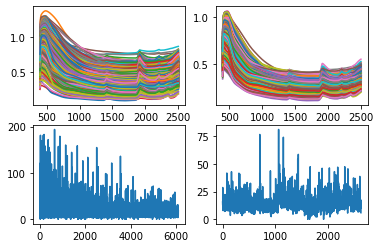

<Figure size 360x360 with 0 Axes>

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.figure(figsize=(5, 5))

wl1=np.arange(400, 2500, 0.5)
X1 = df1.values[:,:]
#plt.figure()
#ax1=plt.subplot(211)
ax1.plot(wl1, X1.T)

wl2=np.arange(400, 2500, 0.5)
X2 = df2.values[:,:]
#plt.figure()
#ax2=plt.subplot(212)
ax2.plot(wl2, X2.T)

#plt.figure()
#ax3=plt.subplot(221)
ax3.plot(df3)

##plt.figure()
#ax4=plt.subplot(222)
ax4.plot(df4)





Text(0, 0.5, 'Reflectance')

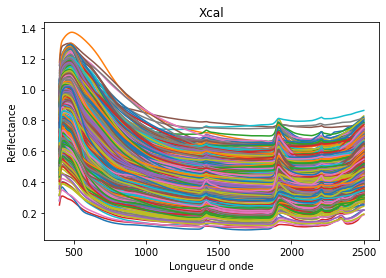

In [13]:
plt.plot(wl1, X1.T)
plt.title('Xcal')
plt.xlabel('Longueur d onde')
plt.ylabel('Reflectance')

Text(0, 0.5, 'Reflectance')

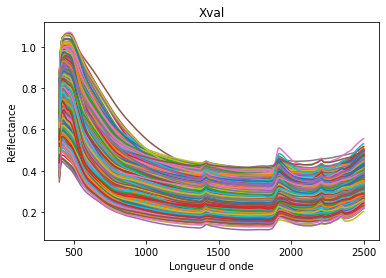

In [14]:
plt.plot(wl2, X2.T)
plt.title('Xval')
plt.xlabel('Longueur d onde')
plt.ylabel('Reflectance')

Text(0, 0.5, 'Amplitude')

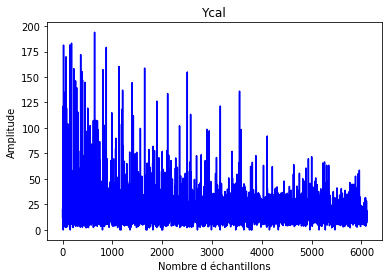

In [15]:
plt.plot(df3, 'b')
plt.title('Ycal')
plt.xlabel('Nombre d échantillons')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

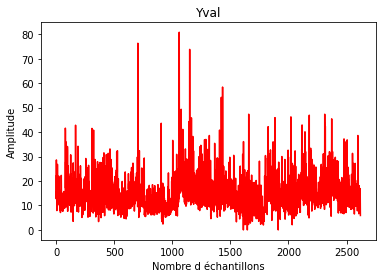

In [16]:
plt.plot(df4, 'r')
plt.title('Yval')
plt.xlabel('Nombre d échantillons')
plt.ylabel('Amplitude')

**2)** Pour `Wheat_Proteine_100_Wang`


In [17]:
df_1 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\Wheat_Proteine_100_Wang\\Xcal.csv", delimiter=None, sep = ';', header=0)
df_2 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\Wheat_Proteine_100_Wang\\Xval.csv", delimiter=None, sep = ';', header=0)
df_3 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\Wheat_Proteine_100_Wang\\Ycal.csv", delimiter=None, sep = ';', header=0)
df_4 = pd.read_csv("C:\\Users\\DASSEBE\\Stage\\TRANSPIR\\BACON\\data\\Wheat_Proteine_100_Wang\\Yval.csv", delimiter=None, sep = ';', header=0)

In [18]:
df_1.shape, df_2.shape, df_3.shape, df_4.shape

((80, 701), (20, 701), (80, 1), (20, 1))

In [19]:
df_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V692,V693,V694,V695,V696,V697,V698,V699,V700,V701
0,0.326716,0.325994,0.325249,0.324536,0.323904,0.323302,0.322734,0.322217,0.321808,0.321529,...,0.921076,0.923076,0.924843,0.926244,0.927392,0.928888,0.929666,0.930272,0.930866,0.931121
1,0.360368,0.359781,0.359116,0.358559,0.358096,0.357736,0.357442,0.357216,0.357267,0.357376,...,1.253930,1.255702,1.257668,1.259323,1.260367,1.261380,1.262095,1.262929,1.263137,1.263582
2,0.301726,0.301156,0.300563,0.299997,0.299543,0.299125,0.298803,0.298547,0.298452,0.298463,...,1.135981,1.138341,1.140097,1.141616,1.143261,1.144453,1.145283,1.146191,1.146255,1.146956
3,0.358755,0.358154,0.357505,0.356910,0.356463,0.355990,0.355695,0.355456,0.355374,0.355452,...,1.175104,1.177155,1.179075,1.180682,1.182445,1.183608,1.184195,1.184885,1.185144,1.185722
4,0.322966,0.322350,0.321705,0.321120,0.320596,0.320137,0.319691,0.319360,0.319110,0.318990,...,1.010284,1.012562,1.014299,1.015781,1.017423,1.018484,1.019513,1.020293,1.020427,1.021194


In [20]:
df_2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V692,V693,V694,V695,V696,V697,V698,V699,V700,V701
0,0.352126,0.351552,0.350901,0.350292,0.349800,0.349424,0.349054,0.348812,0.348637,0.348725,...,1.213300,1.215009,1.216978,1.218543,1.220077,1.221094,1.221698,1.222458,1.222531,1.222899
1,0.345734,0.345115,0.344501,0.343866,0.343335,0.342929,0.342517,0.342250,0.342143,0.342149,...,1.130677,1.132636,1.134240,1.135827,1.137077,1.138401,1.138993,1.139543,1.139848,1.140260
2,0.380012,0.379461,0.378808,0.378227,0.377794,0.377372,0.376969,0.376758,0.376619,0.376771,...,1.207364,1.209341,1.211252,1.212775,1.214302,1.215281,1.216130,1.217018,1.217314,1.217679
3,0.316202,0.315692,0.315033,0.314515,0.313994,0.313531,0.313179,0.312838,0.312646,0.312546,...,1.068851,1.070808,1.072714,1.074729,1.075955,1.077259,1.078274,1.079067,1.079701,1.079877
4,0.320144,0.319596,0.318970,0.318431,0.317956,0.317534,0.317158,0.316863,0.316684,0.316615,...,1.071132,1.073212,1.075095,1.076730,1.078169,1.079336,1.080348,1.081057,1.081475,1.082138


In [21]:
df_3.head()

,x
0,13.03
1,12.23
2,9.49
3,11.92
4,11.08


In [22]:
df_4.head()

,x
0,11.11
1,11.81
2,13.41
3,10.96
4,11.25


Graphes représentant le spectre `(Xcal, Xval)` et les analytes `(Ycal, Yval)`

In [23]:
len(np.arange(0, 350.5, 0.5))

701

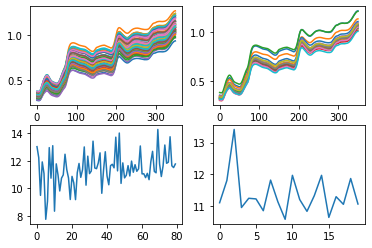

<Figure size 360x360 with 0 Axes>

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.figure(figsize=(5, 5))

wl_1=np.arange(0, 350.5, 0.5)
X_1 = df_1.values[:,:]
#plt.figure()
#ax1=plt.subplot(211)
ax1.plot(wl_1, X_1.T)

wl_2=np.arange(0, 350.5, 0.5)
X_2 = df_2.values[:,:]
#plt.figure()
#ax2=plt.subplot(212)
ax2.plot(wl_2, X_2.T)

#plt.figure()
#ax3=plt.subplot(221)
ax3.plot(df_3)

##plt.figure()
#ax4=plt.subplot(222)
ax4.plot(df_4)

Text(0, 0.5, 'Reflectance')

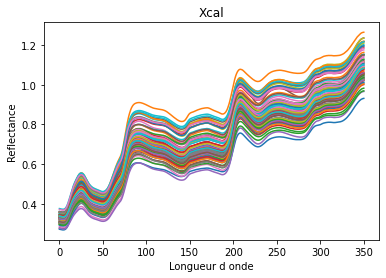

In [25]:
plt.plot(wl_1, X_1.T)
plt.title('Xcal')
plt.xlabel('Longueur d onde')
plt.ylabel('Reflectance')

Text(0, 0.5, 'Reflectance')

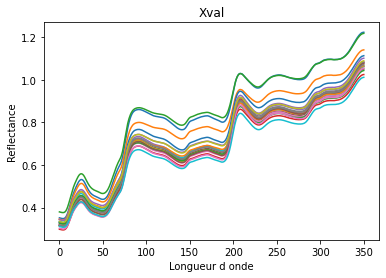

In [26]:
plt.plot(wl_2, X_2.T)
plt.title('Xval')
plt.xlabel('Longueur d onde')
plt.ylabel('Reflectance')

Text(0, 0.5, 'Amplitude')

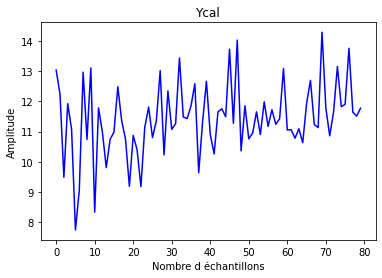

In [27]:
plt.plot(df_3, 'b')
plt.title('Ycal')
plt.xlabel('Nombre d échantillons')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

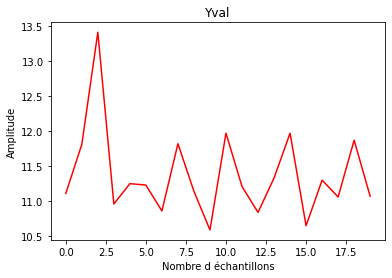

In [28]:
plt.plot(df_4, 'r')
plt.title('Yval')
plt.xlabel('Nombre d échantillons')
plt.ylabel('Amplitude')

### Filtrage des spectres.

1. `Multiplicative scatter correction`

In [29]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''

    # Baseline correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()

    # Get the reference spectrum. If not given, estimate from the mean    
    if reference is None:    
        # Calculate mean
        matm = np.mean(input_data, axis=0)
    else:
        matm = reference

    # Define a new data matrix and populate it with the corrected data    
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(matm, input_data[i,:], 1, full=True)
        # Apply correction
        output_data[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 

    return (output_data, matm)

2. `Standard Normal Variate`




In [30]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):

        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])

    return output_data

In [31]:
df_1.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V692,V693,V694,V695,V696,V697,V698,V699,V700,V701
0,0.326716,0.325994,0.325249,0.324536,0.323904,0.323302,0.322734,0.322217,0.321808,0.321529,...,0.921076,0.923076,0.924843,0.926244,0.927392,0.928888,0.929666,0.930272,0.930866,0.931121
1,0.360368,0.359781,0.359116,0.358559,0.358096,0.357736,0.357442,0.357216,0.357267,0.357376,...,1.253930,1.255702,1.257668,1.259323,1.260367,1.261380,1.262095,1.262929,1.263137,1.263582


In [32]:
df_1.values[0:1]

array([[0.326716, 0.325994, 0.325249, 0.324536, 0.323904, 0.323302,
        0.322734, 0.322217, 0.321808, 0.321529, 0.321348, 0.321433,
        0.321707, 0.322304, 0.323258, 0.324621, 0.326385, 0.328573,
        0.331179, 0.334079, 0.337374, 0.340818, 0.344585, 0.348523,
        0.352584, 0.356694, 0.360825, 0.364852, 0.368901, 0.372799,
        0.376635, 0.380126, 0.383522, 0.386653, 0.389593, 0.392348,
        0.394973, 0.397501, 0.399894, 0.402255, 0.404497, 0.406755,
        0.40889 , 0.410832, 0.412578, 0.414064, 0.415314, 0.416153,
        0.416785, 0.417046, 0.417002, 0.416667, 0.416101, 0.41515 ,
        0.413979, 0.412426, 0.410711, 0.40859 , 0.406337, 0.403756,
        0.401152, 0.398332, 0.395701, 0.392908, 0.390325, 0.387774,
        0.385351, 0.383015, 0.380737, 0.378737, 0.376827, 0.375079,
        0.373412, 0.371871, 0.370523, 0.369183, 0.367994, 0.366847,
        0.365839, 0.364854, 0.364007, 0.363161, 0.362415, 0.361674,
        0.360978, 0.360249, 0.35956 , 0.358807, 

In [33]:
type(df_1.values[0:1])

numpy.ndarray

## Application de quelques corrections

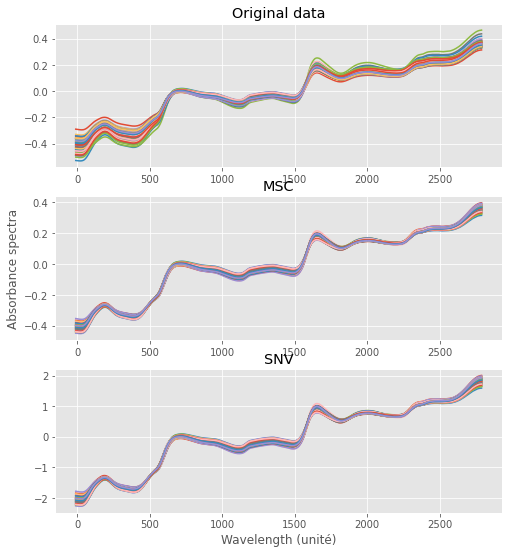

In [34]:
data = df_1
X = data.values[:,:]
wl = np.arange(-10, 2794, 4)

# Apply correction
Xmsc = msc(X)[0] # Take the first element of the output tuple
Xsnv = snv(X)

## Plot original and corrected spectra
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(311)
    plt.plot(wl, X.T)
    plt.title('Original data')
    
    ax2 = plt.subplot(312)
    plt.plot(wl, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
    
    ax2 = plt.subplot(313)
    plt.plot(wl, Xsnv.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('SNV')
    
    plt.show()

(Gaussian filters) appliqués sur les données initiales

In [35]:
def gaussian_1(x):
    return gaussian_filter(x, order=2, sigma=1)
def gaussian_2(x):
    return gaussian_filter(x, order=0, sigma=2)
def gaussian_3(x):
    return gaussian_filter(x, order=1, sigma=2)
def gaussian_4(x):
    return gaussian_filter(x, order=1, sigma=1)

In [36]:
D1 = gaussian_1(df_1)
D2 = gaussian_2(df_1)
D3 = gaussian_3(df_1)
D4 = gaussian_4(df_1)

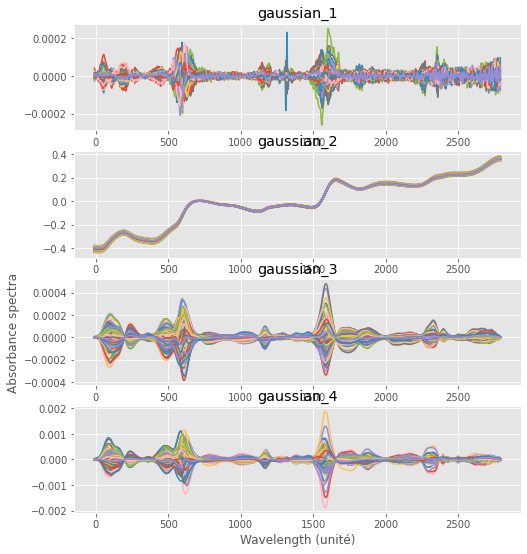

In [37]:

plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(411)
    plt.plot(wl, D1.T)
    plt.title('gaussian_1')
    
    ax2 = plt.subplot(412)
    plt.plot(wl, D2.T)    
    plt.title('gaussian_2')
    
    ax2 = plt.subplot(413)
    plt.plot(wl, D3.T)
    plt.ylabel('Absorbance spectra')
    plt.title('gaussian_3')

    ax2 = plt.subplot(414)
    plt.plot(wl, D4.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('gaussian_4')
    
    plt.show()

### Autres filters

In [38]:
def sav_1(x):
    return savgol_filter(x, 17, polyorder=2, deriv=2)

def sav_2(x):
    return savgol_filter(x, 5, 2, mode='nearest')

def sav_3(x):
    return savgol_filter(x, 5, 2, mode='mirror')

def sav_4(x):
    return savgol_filter(x, 5, 2)

def haar(x):
    feature_count = len(x[0])
    sample_count = len(x)
    x_haar, _ = pywt.dwt(x, wavelet ='haar', mode = 'per')
    if (feature_count % 2) == 0:
        return np.stack((x_haar, x_haar), axis=2).reshape(sample_count,feature_count)
    else:
        xht=np.stack((x_haar, x_haar), axis=2).reshape(sample_count,feature_count+1)
        return xht[:,0:feature_count]
        
def haar_sq(x):
    return haar(haar(x))

In [39]:
D5 = sav_1(df_1)
D6 = sav_2(df_1)
D7 = sav_3(df_1)
D8 = sav_4(df_1)

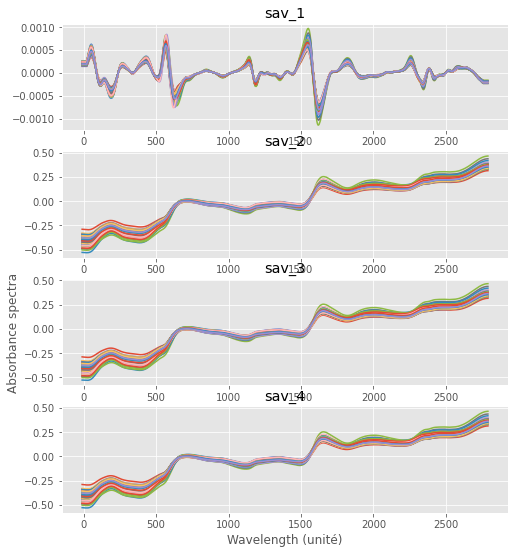

In [40]:
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(411)
    plt.plot(wl, D5.T)
    plt.title('sav_1')
    
    ax2 = plt.subplot(412)
    plt.plot(wl, D6.T)    
    plt.title('sav_2')
    
    ax2 = plt.subplot(413)
    plt.plot(wl, D7.T)
    plt.ylabel('Absorbance spectra')
    plt.title('sav_3')

    ax2 = plt.subplot(414)
    plt.plot(wl, D8.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('sav_4')
    
    plt.show()

### Avec LUCAS_SOC_Cropland_6111_Nocita

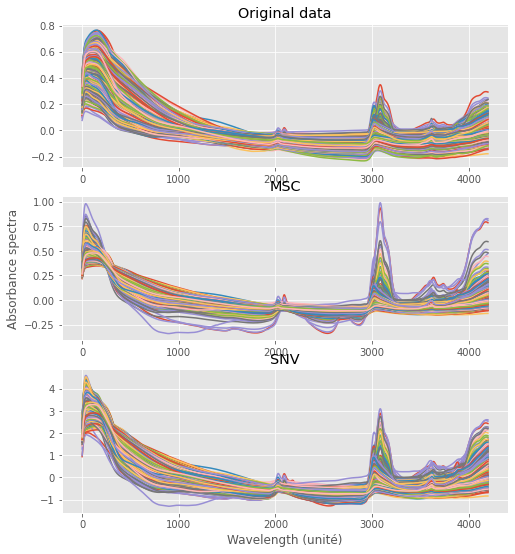

In [41]:
data = df1
X = data.values[:,:]
wl = np.arange(0, 4200, 1)

# Apply correction
Xmsc = msc(X)[0] # Take the first element of the output tuple
Xsnv = snv(X)

## Plot original and corrected spectra
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(311)
    plt.plot(wl, X.T)
    plt.title('Original data')
    
    ax2 = plt.subplot(312)
    plt.plot(wl, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
    
    ax2 = plt.subplot(313)
    plt.plot(wl, Xsnv.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('SNV')
    
    plt.show()

In [ ]:
d1 = gaussian_1(df1)
d2 = gaussian_2(df1)
d3 = gaussian_3(df1)
d4 = gaussian_4(df1)

In [ ]:

plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(411)
    plt.plot(wl, d1.T)
    plt.title('gaussian_1')
    
    ax2 = plt.subplot(412)
    plt.plot(wl, d2.T)    
    plt.title('gaussian_2')
    
    ax2 = plt.subplot(413)
    plt.plot(wl, d3.T)
    plt.ylabel('Absorbance spectra')
    plt.title('gaussian_3')

    ax2 = plt.subplot(414)
    plt.plot(wl, d4.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('gaussian_4')
    
    plt.show()

In [ ]:
d5 = sav_1(df1)
d6 = sav_2(df1)
d7 = sav_3(df1) 
d8 = sav_4(df1) 

In [ ]:
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(411)
    plt.plot(wl, d5.T)
    plt.title('sav_1')
    
    ax2 = plt.subplot(412)
    plt.plot(wl, d6.T)    
    plt.title('sav_2')
    
    ax2 = plt.subplot(413)
    plt.plot(wl, d7.T)
    plt.ylabel('Absorbance spectra')
    plt.title('sav_3')

    ax2 = plt.subplot(414)
    plt.plot(wl, d8.T)
    plt.xlabel('Wavelength (unité)')
    plt.title('sav_4')
    
    plt.show()